## It is an EDA analysis on "Hepatitis Domain" project

## Hepatitis Domain 
**Find out:**
* Living conditions for hepatitis 
* The hampers for human body by hepatitis

<b> The dataset and columns of this dataset </b>

In [2]:
#The modules for the EDA(Elementary data analysis)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

* Set the column to the data file to identify the columns

In [3]:
names = ["class_","age", "sex", "sterioid", "antivirals", "fatigue","malaise", "anorexia","liver_big", "liver_firm", "spleen_palable","spiders", "ascities", "varices", "bilirubin","alk_phosphate", "sgot", "albumin","prothtime", "histology"]
df = pd.read_csv("hepatitis.data", names=names, index_col=None, sep=",", na_values="?")
dataset = df.copy()
dataset.head(n=4)

,class_,age,sex,sterioid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascities,varices,bilirubin,alk_phosphate,sgot,albumin,prothtime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1


In [4]:
df.loc[df['sex'] == 2].shape

(16, 20)

In [5]:
dataset.shape

(155, 20)

In [6]:
data_shape = dataset.shape
print(f"This dataset has {data_shape[0]} numbers of data w.r.t {data_shape[1]} columns")

This dataset has 155 numbers of data w.r.t 20 columns


In [7]:
#The informations about the dataset
dataset.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   class_          155 non-null    int64  
 1   age             155 non-null    int64  
 2   sex             155 non-null    int64  
 3   sterioid        154 non-null    float64
 4   antivirals      155 non-null    int64  
 5   fatigue         154 non-null    float64
 6   malaise         154 non-null    float64
 7   anorexia        154 non-null    float64
 8   liver_big       145 non-null    float64
 9   liver_firm      144 non-null    float64
 10  spleen_palable  150 non-null    float64
 11  spiders         150 non-null    float64
 12  ascities        150 non-null    float64
 13  varices         150 non-null    float64
 14  bilirubin       149 non-null    float64
 15  alk_phosphate   126 non-null    float64
 16  sgot            151 non-null    float64
 17  albumin         139 non-null    flo

<b> The datasets contains null a which is presented below in percentage </b>

In [8]:
#check the null a in percentage
dataset.isnull().sum()*100/data_shape[0]

class_             0.000000
age                0.000000
sex                0.000000
sterioid           0.645161
antivirals         0.000000
fatigue            0.645161
malaise            0.645161
anorexia           0.645161
liver_big          6.451613
liver_firm         7.096774
spleen_palable     3.225806
spiders            3.225806
ascities           3.225806
varices            3.225806
bilirubin          3.870968
alk_phosphate     18.709677
sgot               2.580645
albumin           10.322581
prothtime         43.225806
histology          0.000000
dtype: float64

##### Insights
- The Protine column has 43.22% data missing. So, we convert it 0 value

In [9]:
#Check the duplicate data
dataset.duplicated().sum()

0

In [10]:
#The null data is filled with the values of 0 
dataset.fillna(value=0).head(n=4)

,class_,age,sex,sterioid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascities,varices,bilirubin,alk_phosphate,sgot,albumin,prothtime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,0.0,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,0.0,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,0.0,1
3,2,31,1,0.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1


In [11]:
#Check the uniqueness in the dataset
for col in dataset.columns:
    dataset_length = len(dataset[col].unique())
    if dataset_length <= 3:
        dataset[col] = dataset[col].astype("object")
        print("The column '{}' has numbers of unique values : {}".format(col,dataset[col].unique()))

The column 'class_' has numbers of unique values : [2 1]
The column 'sex' has numbers of unique values : [2 1]
The column 'sterioid' has numbers of unique values : [1.0 2.0 nan]
The column 'antivirals' has numbers of unique values : [2 1]
The column 'fatigue' has numbers of unique values : [2.0 1.0 nan]
The column 'malaise' has numbers of unique values : [2.0 1.0 nan]
The column 'anorexia' has numbers of unique values : [2.0 1.0 nan]
The column 'liver_big' has numbers of unique values : [1.0 2.0 nan]
The column 'liver_firm' has numbers of unique values : [2.0 1.0 nan]
The column 'spleen_palable' has numbers of unique values : [2.0 1.0 nan]
The column 'spiders' has numbers of unique values : [2.0 1.0 nan]
The column 'ascities' has numbers of unique values : [2.0 1.0 nan]
The column 'varices' has numbers of unique values : [2.0 nan 1.0]
The column 'histology' has numbers of unique values : [1 2]


In [12]:
#List column variables in such Data types 

object_list = []
int_list = []
float_list = []
for col in dataset.columns:
    dataset_type = dataset[col].dtype
    #print("The ''{}'' is a holder of '{}'".format(col, dataset_type), end="\n")
    if dataset_type == "O":
        object_list.append(col)
    elif dataset_type == "int64":
        int_list.append(col)
    elif dataset_type == "float64":
        float_list.append(col)

print("Object List:{0}".format(object_list))
print("Integer List:{0}".format(int_list))
print("Float List:{0}".format(float_list))


Object List:['class_', 'sex', 'sterioid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm', 'spleen_palable', 'spiders', 'ascities', 'varices', 'histology']
Integer List:['age']
Float List:['bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'prothtime']


In [13]:
dataset['class_'] = dataset['class_'].replace([1,2], ['DIE', 'LIVE'])
dataset['sex'] = dataset['sex'].replace([1,2],['Male', 'Female'])
for col in object_list:
    dataset[col] = dataset[col].replace([1,2], ['No', 'Yes'])

In [14]:
dataset.sex.unique()

array(['Female', 'Male'], dtype=object)

In [15]:
#The data is described below 
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,155.0,41.200000,12.565878,7.0,32.00,39.0,50.00,78.0
bilirubin,149.0,1.427517,1.212149,0.3,0.70,1.0,1.50,8.0
alk_phosphate,126.0,105.325397,51.508109,26.0,74.25,85.0,132.25,295.0
sgot,151.0,85.894040,89.650890,14.0,31.50,58.0,100.50,648.0
albumin,139.0,3.817266,0.651523,2.1,3.40,4.0,4.20,6.4
prothtime,88.0,61.852273,22.875244,0.0,46.00,61.0,76.25,100.0


### Insights 
- The data contains the patients who are mean 41 year old with standerd deviation 12.56. So, many patients are found around 30 to 50 years. 7 years old patient also have in dataset.

# Developing Functions for Target Data Finding Out 

In [16]:
#Data Slicing for finding out Specific Dataframe Function by age limitation
def data_slicing_age_limit(age_limit:pd.DataFrame, data_slicing_dict:dict):
    t = dataset
    i = 0
    for key_ in age_limit.keys():
        if key_ == 'less':
            t = t.loc[dataset['age'] < age_limit[key_]]
            ty = "under"
        elif key_ == 'greater':
            t = dataset.loc[dataset['age'] > age_limit[key_]]
            ty = 'over'
        i+=1
    a = t
    
    for key in data_slicing_dict.keys():
        a = a.loc[a[key] == data_slicing_dict[key]]
    return a, ty, age_limit[key_], i-1

In [17]:
#Create more insights for highest and lowest limit with numerical information
def limit_data(data:pd.DataFrame):
    a = data.loc[data['sgot'] <= 45 ].loc[data["bilirubin"] <= 1.2].loc[data['alk_phosphate']<=147].loc[data['albumin'] <= 5.4]
    b = a.loc[a['sgot'] >= 8 ].loc[a["bilirubin"] >= 0.1].loc[a['alk_phosphate']>=44].loc[a['albumin'] >= 3.4]
    return b

In [18]:
#Total data hormonal limitations
data_hormonal_limitation = limit_data(data=dataset)['age'].count()*100/data_shape[0]
global data_hormonal_limitation

In [19]:
#The function calls the hormonal range
def hormonal_range(column:str):
    x_r_1 = 0
    x_r_2 = 0
    ranges = {"bilirubin":{"high_point":1.2, "low_point":0.1},
              "alk_phosphate":{"high_point":147, "low_point":44},
              "sgot":{"high_point":45, "low_point":8},
              "albumin":{"high_point":5.4, "low_point":3.4},
              "prothtime":{"high_point":11, "low_point":13}}
    for rangs in ranges.keys():
        if column == rangs:
            x_r_1 = ranges[rangs]["high_point"]
            x_r_2 = ranges[rangs]["low_point"]
    return x_r_1, x_r_2


# EDA Analysis (Visualization)

## Groupwise Visualization

#### Finding out targeted Groups by Counter Plotting and Pie Chart

- Univariable Data

In [20]:
def plotting_pie_countbar(data:pd.DataFrame,x:str, labels:str):
    fig , ax = plt.subplots(1, 2, figsize=(18, 8))
    sns.countplot(data=data, x=x, palette="PuRd", ax = ax[0])
    for container in ax[0].containers:
        ax[0].bar_label(container=container, color = "black", size=20)
    
    plt.pie(x=dataset[x].value_counts() ,labels=labels,  autopct="%0.2f%%", explode=[0, 0.2], shadow=True, colors=["green", "red"], normalize=True)
    plt.title(label=x)
    plt.show()

- Multi-variable Data

In [21]:
def plotting_pie_multi_variable(data:pd.DataFrame, columns:str):
    length = len(columns)
    plt.subplots(figsize=(length*3, length*2))
    for i in range(length):
        plt.subplot(1,length, i+1)
        plt.pie(x=data[columns[i]].value_counts(), labels=['Yes', 'No'], colors=['green', 'red'], autopct="%.02f%%")
        plt.title(columns[i].capitalize())
    plt.show()

#plotting_pie_multi_variable(data=dataset, columns=object_list)



## Function of Histogram and KDE of Object values


In [22]:
#Histogram and Kernel Distribution Estimation plotting Function
def plotting_hist_kde(data:pd.DataFrame, x:str,x_r_1:float,x_r_2:float, hue_1:str, hue_2:str):
    plt.subplots(figsize=(18, 6))
    plt.subplot(131)
    sns.histplot(data=data, x=x, palette="summer_r", multiple='dodge', bins=int(155/10), kde=True )
    plt.scatter(x=x_r_1, y = 2, c='g')
    plt.scatter(x=x_r_2, y = 2, c='r')
    plt.subplot(132)
    sns.histplot(data=data, x=x, hue=hue_1, palette="Oranges", bins=int(155/10), kde=True, multiple='dodge')
    plt.scatter(x=x_r_1, y = 2, c='g')
    plt.scatter(x=x_r_2, y = 2, c='r')
    plt.subplot(133)
    sns.histplot(data=data, x=x, hue=hue_2, bins=int(155/10), kde=True, palette="Paired_r", multiple="dodge")
    plt.scatter(x=x_r_1, y = 2, c='g')
    plt.scatter(x=x_r_2, y = 2, c='r')
    plt.show()

#plotting(data=dataset, x='sgot', hue_1="class_", hue_2='sex')

# Plotting and Target Dataframe Building by Actual Engine Run

In [23]:
#The functions of creating dataset and plotting
def total_observation(age_limit:dict, data_slicing_dict:dict, hue_1:str, hue_2:str, column:str, fig_n:int==None ):
    print("________________Totalvation________________")

    d, ty, a_g, i= data_slicing_age_limit(age_limit=age_limit, data_slicing_dict=data_slicing_dict)#Only on the required patients
    sizes = d.shape[0]/data_shape[0]
    d_appropriate = limit_data(data=d)#Data Limitation for the good human body
    d_app = d_appropriate['age'].count()*100/data_shape[0]#Data Limitation for the good human body
    if i == 0:
        print(f'__Observation of {sizes*100}% of {data_slicing_dict["sex"]} {data_slicing_dict["class_"]} patients who are {ty} {a_g} years old with {data_slicing_dict["antivirals"]} taking antiviral Data Visualization of how much patients facing {hue_1} and {hue_2}___')
    if i==1:
        print(f'__Observation of {sizes*100}% of {data_slicing_dict["sex"]} {data_slicing_dict["class_"]} patients who are maximum number of old person with {data_slicing_dict["antivirals"]} taking antiviral Data Visualization of how much patients facing {hue_1} and {hue_2}___')

    print("-----------------------Around %0.2f percentage of total patients are in good position-------------" % data_hormonal_limitation)
    print(f"            --_____________________Checking {column}_________________________")
    print("-----------------------Around %0.4f percentage of Observation patients are in good position-------------" % d_app)
    #Plotting the dataset floating value
    print(f"----------------------------The Figure no : {fig_n+1}------------------------------------")
    print(f"----------------------------The Figure name : {column}------------------------------------")
    x_r_1, x_r_2 = hormonal_range(column)
    print("___________________Without Doing Limitations_______________________")
    plotting_hist_kde(data=d, x=column, x_r_1=x_r_1, x_r_2=x_r_2, hue_1=hue_1, hue_2=hue_2 ) 
    print("___________________With Doing Limitations_______________________")
    if d_appropriate.shape[0] >= 7:
        plotting_hist_kde(data=d_appropriate, x=column, x_r_1=x_r_1, x_r_2=x_r_2, hue_1=hue_1, hue_2=hue_2 )
    else:
        print("No plots")
    return d_appropriate, d # data limitations and without limitations
    
def single_observation(age_limit:str, data_slicing_dict:str,column:str, hue_1:str, hue_2:str):
    print("________________Single Observation________________")
    d, ty, a_g, i = data_slicing_age_limit(age_limit=age_limit, data_slicing_dict=data_slicing_dict)
    sizes = d.shape[0]/data_shape[0]
    x_r_1, x_r_2 = hormonal_range(column)
    d_appropriate = limit_data(data=d)#Data Limitation for the good human body
    d_app = d_appropriate['age'].count()*100/data_shape[0]#Data Limitation for the good human body
    for key in data_slicing_dict.keys():
        pass
    
    if i == 0:
        print(f'__Observation of {sizes*100}% of {data_slicing_dict[key]} {key} patients who are {ty} {a_g} years old Data Visualization of how much patients facing {hue_1} and {hue_2}___')
    if i == 1:
        print(f'__Observation of {sizes*100}% of {data_slicing_dict[key]} {key} patients who are maximum number of old person Data Visualization of how much patients facing {hue_1} and {hue_2}___')

    print("-----------------------Around %0.2f percentage of total patients are in good position-------------" % data_hormonal_limitation)
    print(f"            --_____________________Checking {column}_________________________")
    print("-----------------------Around %0.4f percentage of Observation patients are in good position-------------" % d_app)
    #Plotting the dataset floating value 
    print(f"----------------------------The Figure name : {column}------------------------------------")

    print("___________________Without Doing Limitations_______________________")
    plotting_hist_kde(data=d, x=column, x_r_1=x_r_1, x_r_2=x_r_2, hue_1=hue_1, hue_2=hue_2 ) 
    print("___________________With Doing Limitations_______________________")
    if d_appropriate.shape[0] >= 7:
        plotting_hist_kde(data=d_appropriate, x=column, x_r_1=x_r_1, x_r_2=x_r_2, hue_1=hue_1, hue_2=hue_2 ) 
    else:
        print("No plots")

    
    return d_appropriate, d # data limitations and without limitations



# The plot distribution cells are placed below

In [24]:
#The cells of creating target dataset and plotting

def working_with_objects(): #helping to select the proper
    #sex, class_, antivirals plot for selecting target
    sex_labels = ['Male', "Female"]
    class_labels = ['Live', "Die"]
    antivirals_labels = ['Yes', "No"]
    list1 = ['class_', 'sex', 'antivirals'] 
    list2 = ['sterioid',
    'fatigue',
    'malaise',
    'anorexia',
    'liver_big',
    'liver_firm',
    'spleen_palable',
    'spiders',
    'ascities',
    'varices',
    'histology']#multivariable checkup

    print("___________Finding out the variable for building details analysis by Pie charts_______")
    for lis in list1:
        if lis == 'sex':
            labels = sex_labels
        if lis == 'class_':
            labels = class_labels
        if lis == 'antivirals':
            labels = antivirals_labels
        print(f"___________Univariable check up: {lis} __________")
        plotting_pie_countbar(data=dataset, x=lis, labels=labels)

    print("____________________________________________MultiVariable Checkup____________________________________________")
    plotting_pie_multi_variable(data=dataset, columns=list2)
    # End of variable checkup

    #Age selection 
    mean_age = dataset.age.mean()
    std_age = dataset.age.std()
    highest_minimum = mean_age + std_age
    lowest_maximum = mean_age - std_age
    print("__________________Showing the numbers of ages contains__________________")
    plt.subplots(figsize=(20, 10))
    sns.countplot(x="age", data=dataset,)
    plt.show()
    print("_____________The maximum age placed___________")
    plt.subplots(figsize=(15, 10))
    sns.boxplot(x='age', data=dataset, color='red')
    plt.xlabel("Ages")
    plt.show()
    #End of age Selections
    return lowest_maximum, highest_minimum


___________Finding out the variable for building details analysis by Pie charts_______
___________Univariable check up: class_ __________


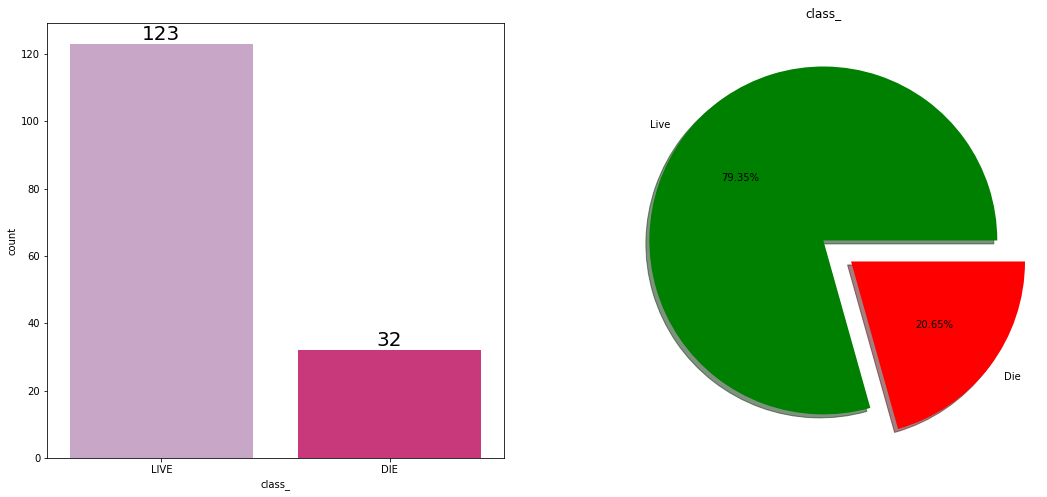

___________Univariable check up: sex __________


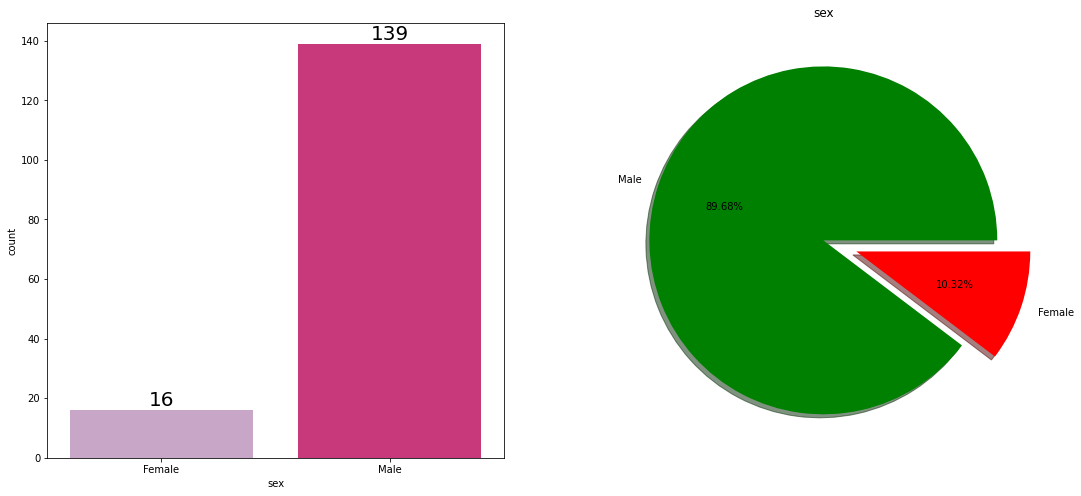

___________Univariable check up: antivirals __________


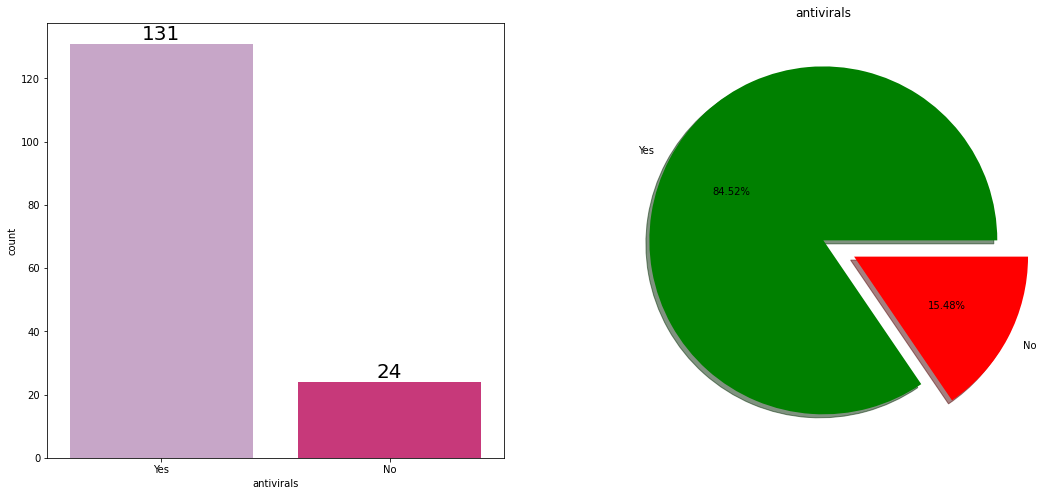

____________________________________________MultiVariable Checkup____________________________________________


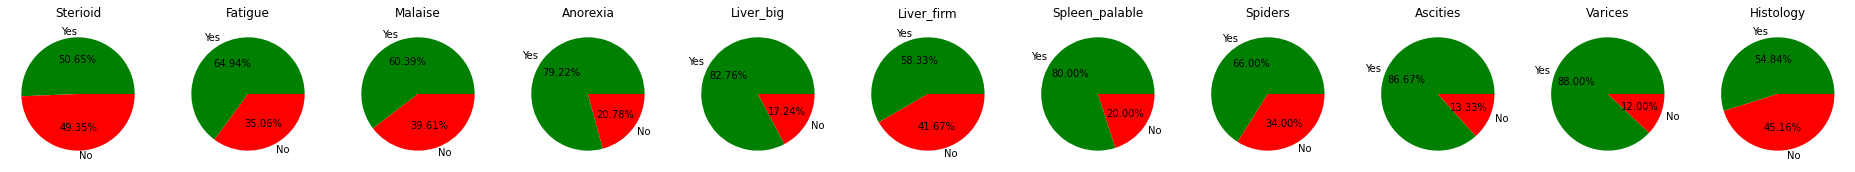

__________________Showing the numbers of ages contains__________________


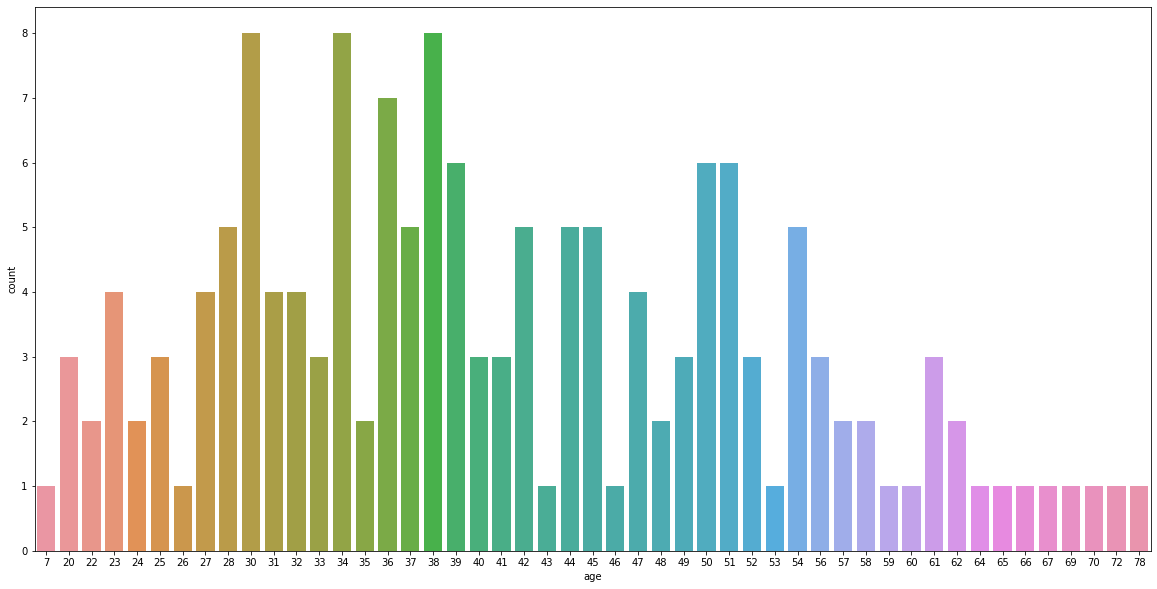

_____________The maximum age placed___________


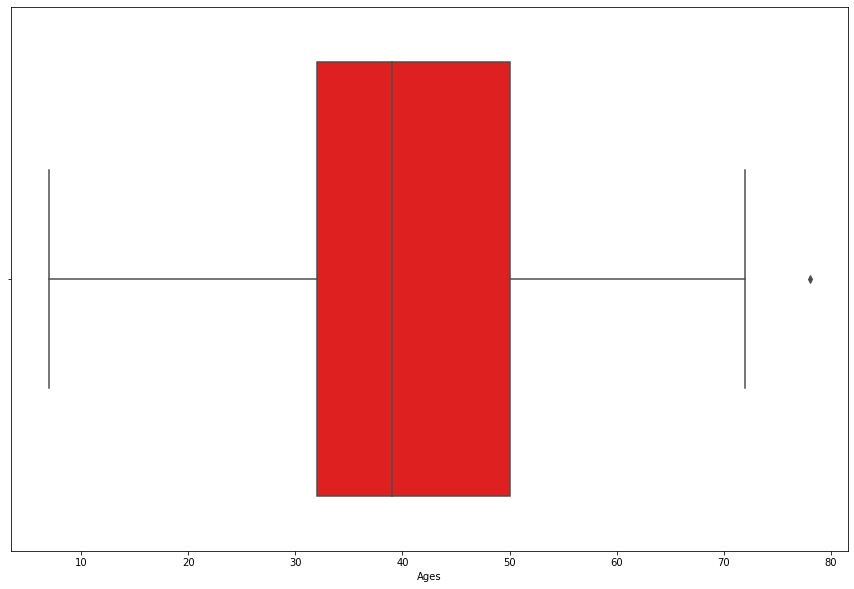

In [25]:
lowest_maximum, highest_minimum  = working_with_objects()

#### INSIGHTS:
- The maximum number of age is in between 30 to 50 years old
- Male data was taken more than wemen
- Most of them are taken antivirals and having the symptoms

In [26]:
float_list, object_list

(['bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'prothtime'],
 ['class_',
  'sex',
  'sterioid',
  'antivirals',
  'fatigue',
  'malaise',
  'anorexia',
  'liver_big',
  'liver_firm',
  'spleen_palable',
  'spiders',
  'ascities',
  'varices',
  'histology'])

________________Single Observation________________
__Observation of 56.12903225806451% of LIVE class_ patients who are maximum number of old person Data Visualization of how much patients facing histology and liver_big___
-----------------------Around 18.71 percentage of total patients are in good position-------------
            --_____________________Checking bilirubin_________________________
-----------------------Around 13.5484 percentage of Observation patients are in good position-------------
----------------------------The Figure name : bilirubin------------------------------------
___________________Without Doing Limitations_______________________


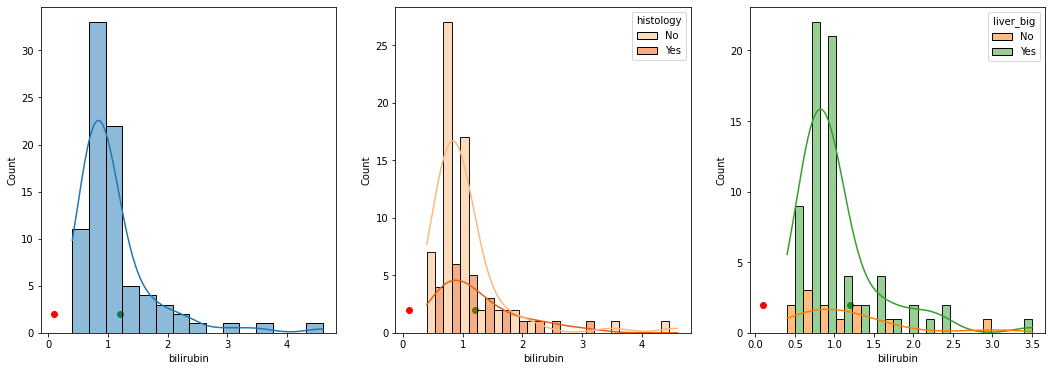

___________________With Doing Limitations_______________________


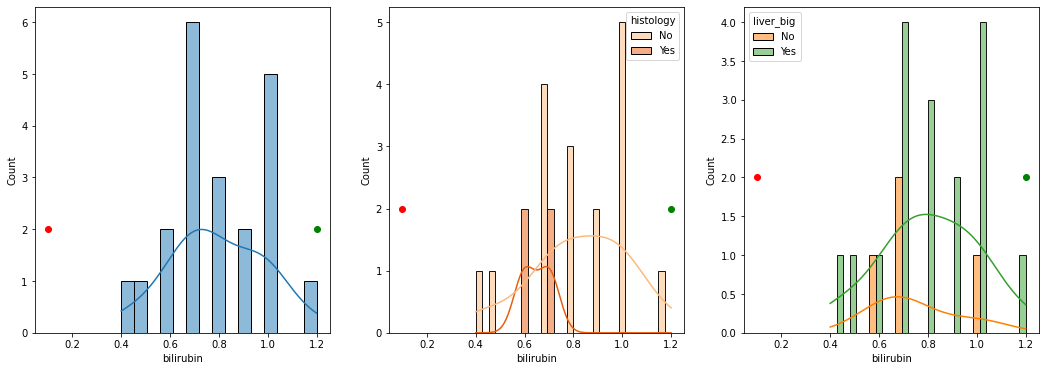

________________Totalvation________________
__Observation of 41.935483870967744% of Male LIVE patients who are maximum number of old person with Yes taking antiviral Data Visualization of how much patients facing histology and liver_big___
-----------------------Around 18.71 percentage of total patients are in good position-------------
            --_____________________Checking bilirubin_________________________
-----------------------Around 7.7419 percentage of Observation patients are in good position-------------
----------------------------The Figure no : 1------------------------------------
----------------------------The Figure name : bilirubin------------------------------------
___________________Without Doing Limitations_______________________


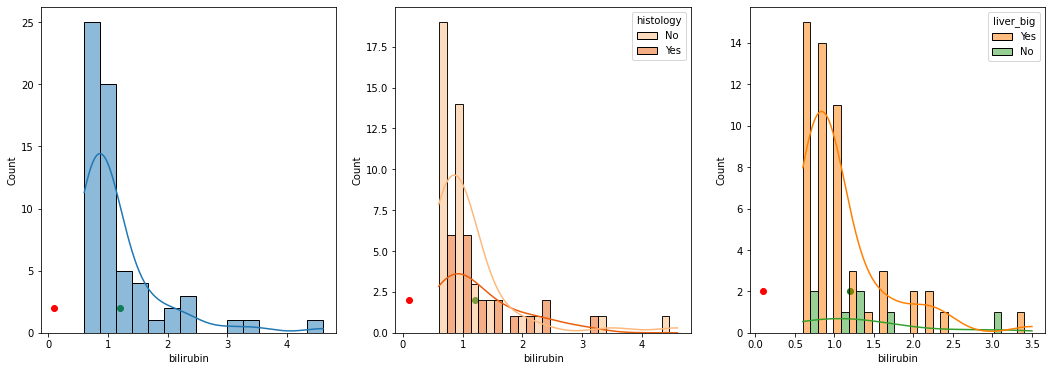

___________________With Doing Limitations_______________________


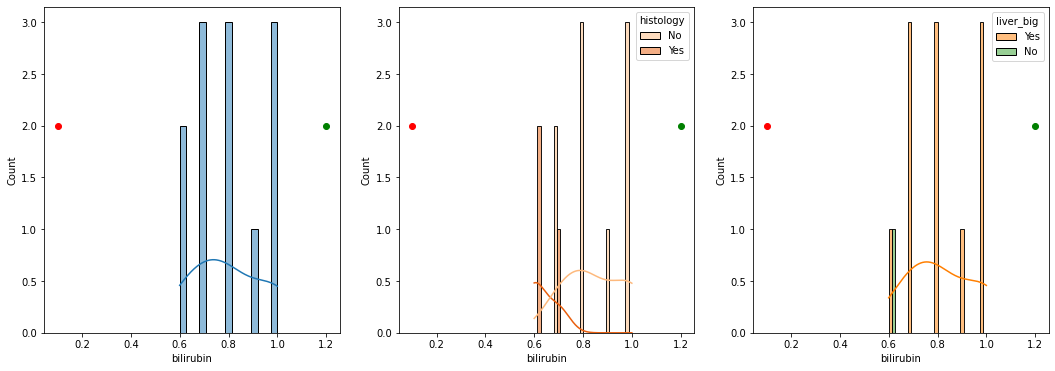

________________Single Observation________________
__Observation of 56.12903225806451% of LIVE class_ patients who are maximum number of old person Data Visualization of how much patients facing histology and liver_big___
-----------------------Around 18.71 percentage of total patients are in good position-------------
            --_____________________Checking alk_phosphate_________________________
-----------------------Around 13.5484 percentage of Observation patients are in good position-------------
----------------------------The Figure name : alk_phosphate------------------------------------
___________________Without Doing Limitations_______________________


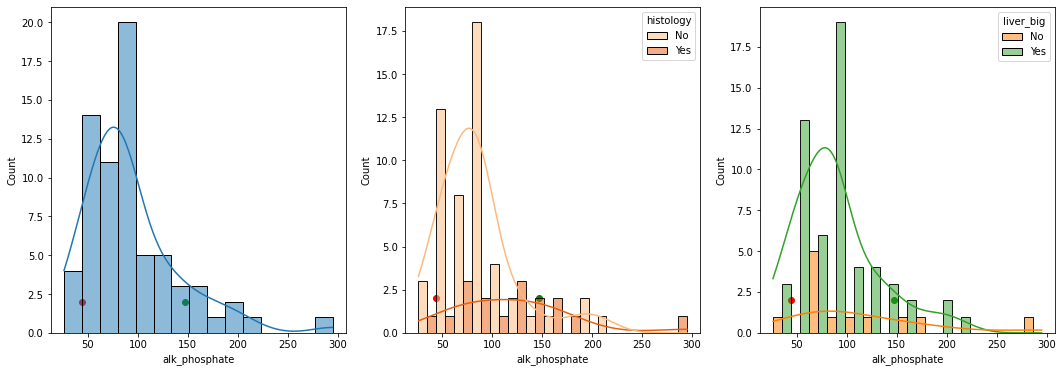

___________________With Doing Limitations_______________________


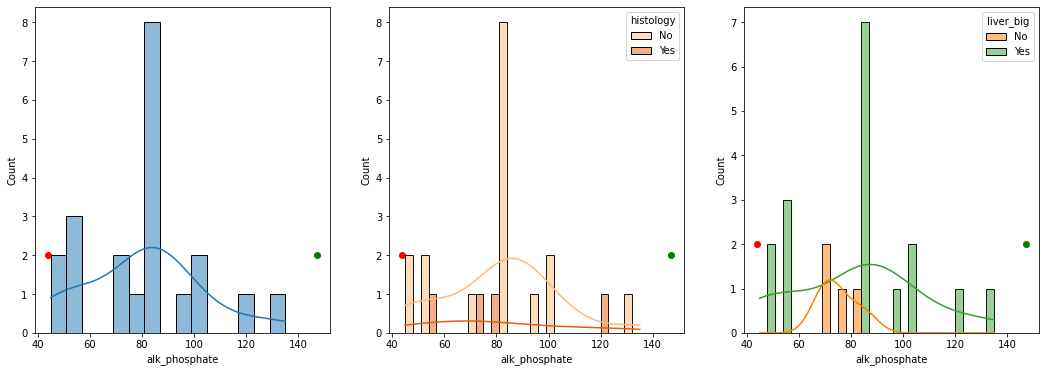

________________Totalvation________________
__Observation of 41.935483870967744% of Male LIVE patients who are maximum number of old person with Yes taking antiviral Data Visualization of how much patients facing histology and liver_big___
-----------------------Around 18.71 percentage of total patients are in good position-------------
            --_____________________Checking alk_phosphate_________________________
-----------------------Around 7.7419 percentage of Observation patients are in good position-------------
----------------------------The Figure no : 2------------------------------------
----------------------------The Figure name : alk_phosphate------------------------------------
___________________Without Doing Limitations_______________________


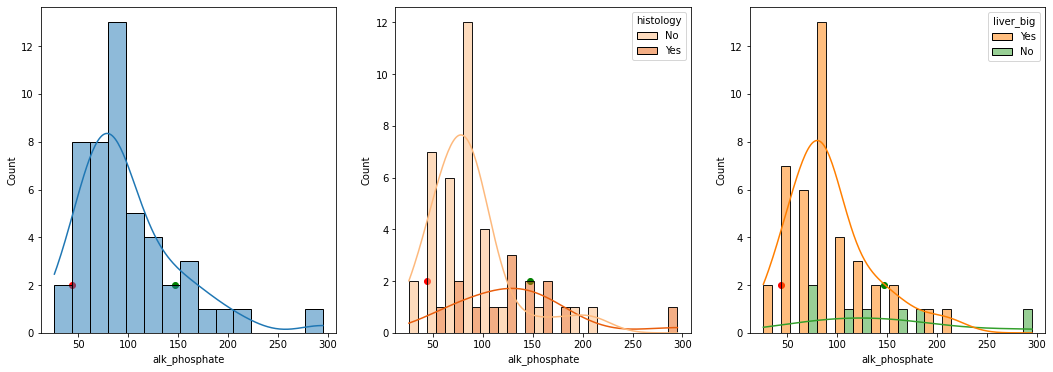

___________________With Doing Limitations_______________________


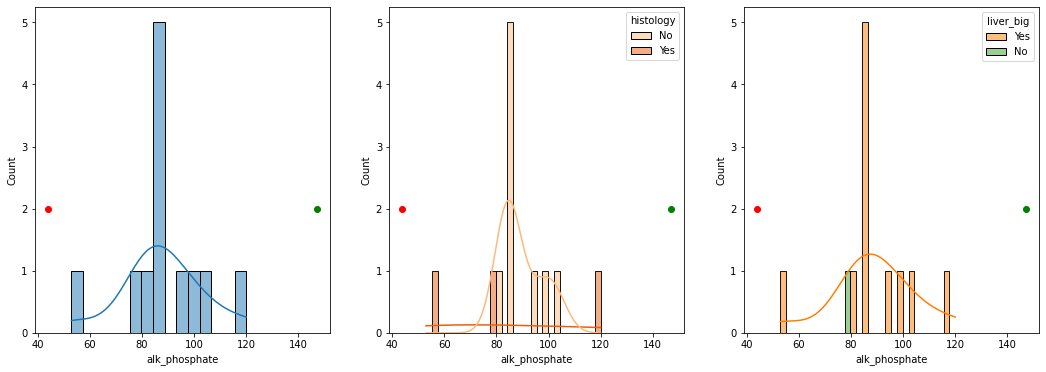

_______histology effecting on the tests.___________


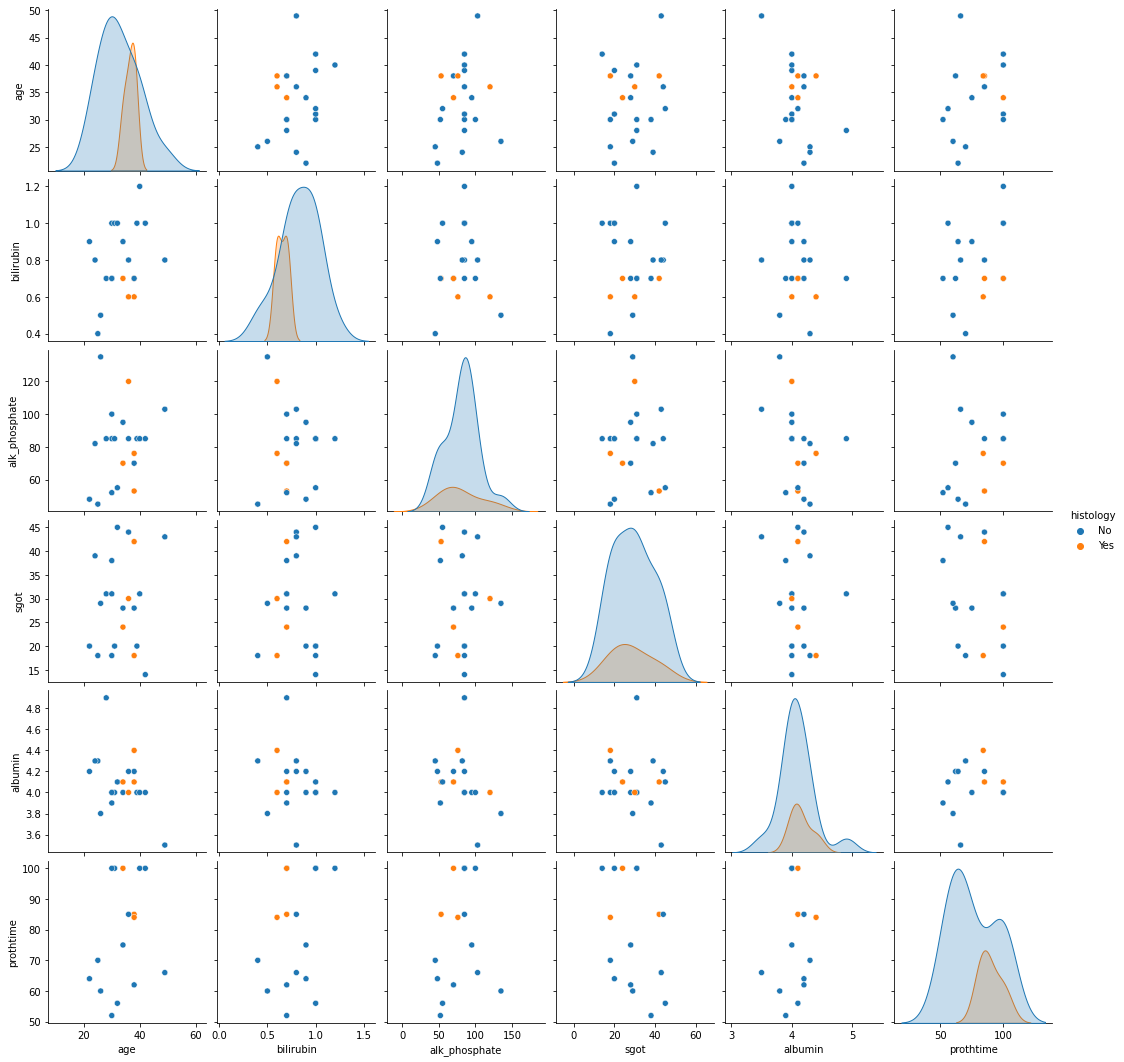

In [27]:
age_limit = {"greater": 20, 'less': 50}
data_slicing_dict_total = {"sex":"Male", "class_":"LIVE", "antivirals":"Yes"}
data_slicing_dict_single = {"class_":"LIVE"}
hue_1 = "histology"
hue_2 = "liver_big"

fig_n = 0
for ind, column in enumerate(float_list[0:2]):
    fig_n =+ ind
    single_observation_limit_data, single_observation_slice_data = single_observation(age_limit=age_limit, data_slicing_dict=data_slicing_dict_single, column=column,hue_1=hue_1, hue_2=hue_2)
    final_limit_data, slicing_data = total_observation(age_limit=age_limit, data_slicing_dict=data_slicing_dict_total, hue_1=hue_1, hue_2=hue_2, column=column, fig_n=fig_n)
print(f"_______{hue_1} effecting on the tests.___________")
sns.pairplot(data=single_observation_limit_data, hue=hue_1)
plt.show()

#### INSIGHTS
- All of the enzymes and hormones are in normal limitations on the living patients except the prothrombin timing
- The KDE is also pointing out the exact quantity of the enzymes and hormones on living patients
- It is also observered the maximum numbers of age along with sex comparison

Catplot


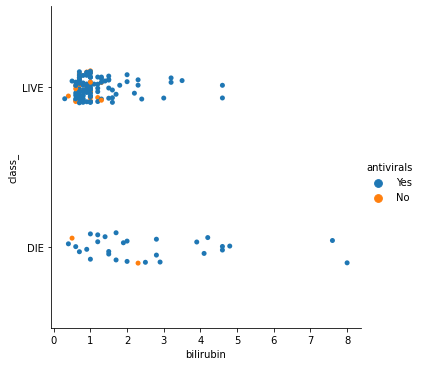

Stripplot


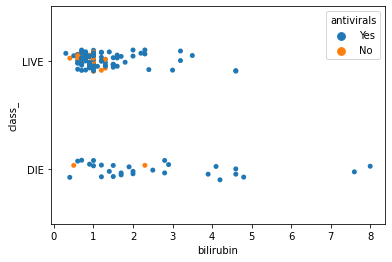

Catplot


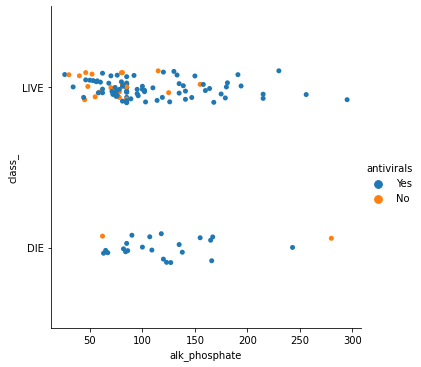

Stripplot


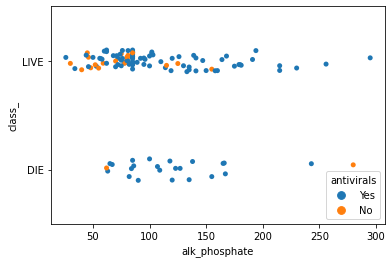

Catplot


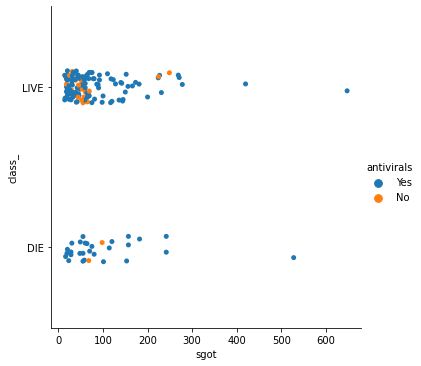

Stripplot


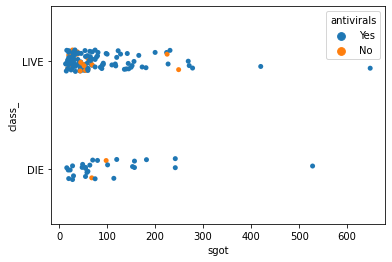

Catplot


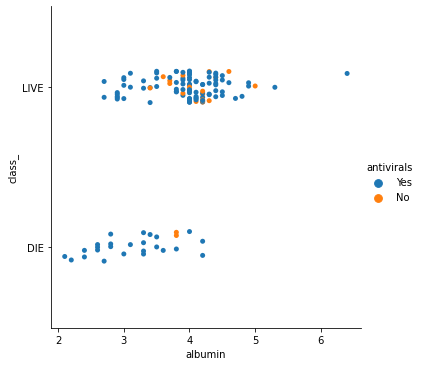

Stripplot


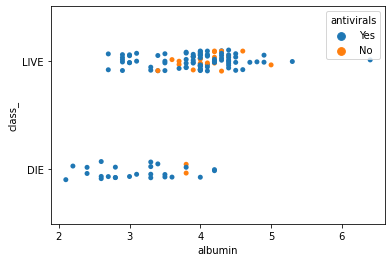

Catplot


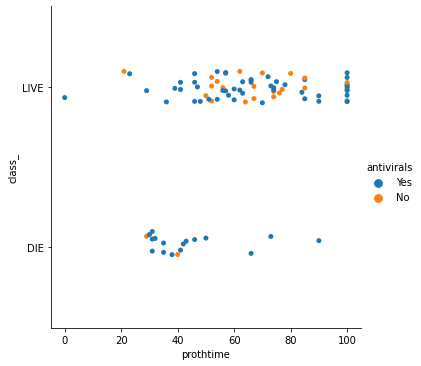

Stripplot


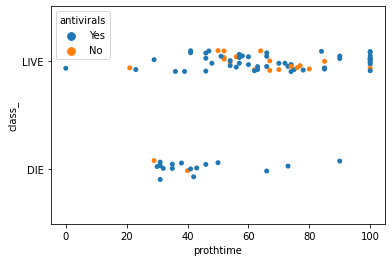

In [28]:
#Machine Learning model selection
for col in float_list:
    print("Catplot")
    sns.catplot(data=dataset, x=col, y= 'class_', hue='antivirals')
    plt.show()
    print("Stripplot")
    sns.stripplot(data=dataset, x=col, y= 'class_', hue='antivirals')
    plt.show()
#plt.ylim(0, 4.5)


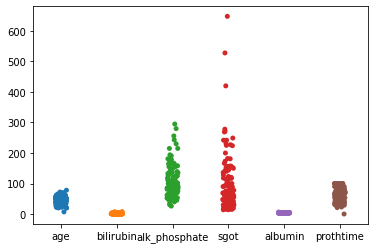

In [29]:
sns.stripplot(data=dataset)
plt.show()

#### INSIGHTS
- The dataset is catgorical and plotting discrete points. So, the data are running a non-linear plotting.



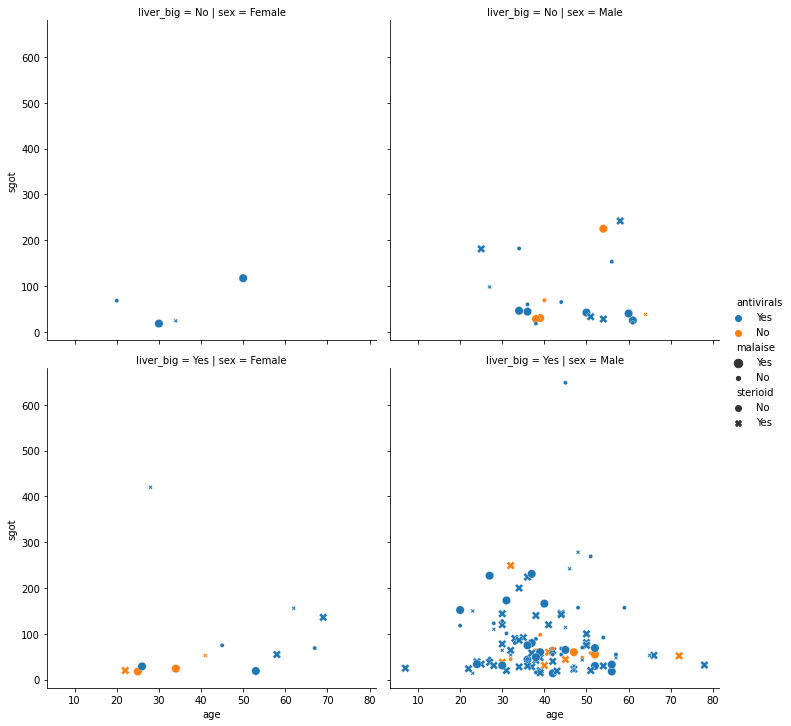

In [43]:
sns.relplot(data=dataset, x='age', y='sgot', col='sex', hue='antivirals', style='sterioid', size='malaise', row='liver_big')
plt.show()